# **Image Generation with FalAIVisionModel**

### **Introduction:**  
FalAI provides a suite of high-performance vision models optimized for speed, accuracy, and scalability, enabling advanced computer vision tasks. Groq's models, including cutting-edge architectures for object detection, image classification, and segmentation, are designed for developers and data scientists who need robust, low-latency solutions for real-time vision applications.  

This notebook will guide users through setting up and utilizing **GroqVisionModel** within **Swarmauri** for a variety of use cases.

---

This notebook will:  

- Introduce the setup and initialization of **FalAIModel** within **Swarmauri**.  
- Demonstrate **synchronous image prediction**, **asynchronous processing**, and **batch prediction** for multiple images.   

By the end of this notebook, you will have a comprehensive understanding of how to use **FalAIVisionModel** to process and analyze visual data efficiently, making it an invaluable tool for real-time vision tasks across industries such as healthcare, security, and autonomous systems.  

# **Setup and Configuration**

## Import the FalAIVision class

In [4]:
from swarmauri.llms.concrete.FalAIVisionModel import FalAIVisionModel

### Load your API KEY from your environment variables
- Make sure you have python-dotenv installed if not, run `pip install python-dotenv` so you can install it.
- Get your API KEY [HERE](https://fal.ai/dashboard/keys)

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

FAL_API_KEY = os.getenv("FAL_API_KEY")

### Initialize FalAIVisionModel
- Note: You can as well input your api key directly, but it's better to load from env file
- Also, the `name` arguments is an optional argument that allows you to input a model from the list of allowed_models.

In [6]:
model = FalAIVisionModel(api_key=FAL_API_KEY, name="fal-ai/llava-next") 

### **Simple Example Using the `process_image` Method**

The `process_image` method in **FalAIVisionModel** allows users to interact with images by providing a URL to the image and a prompt describing the task or question. The method processes the input and returns a response based on the prompt, enabling powerful vision-based applications.

In this example, we’ll pass the URL of the famous painting "Mona Lisa" to the model and ask two questions:  

1. Who drew the painting?  
2. What is the painting known for?  

Additionally, to display the image directly in this Jupyter notebook, we’ll use the utility function `img_url_to_in_memory_img` from `swarmauri.utils`, which converts the image URL into an in-memory image for visualization.

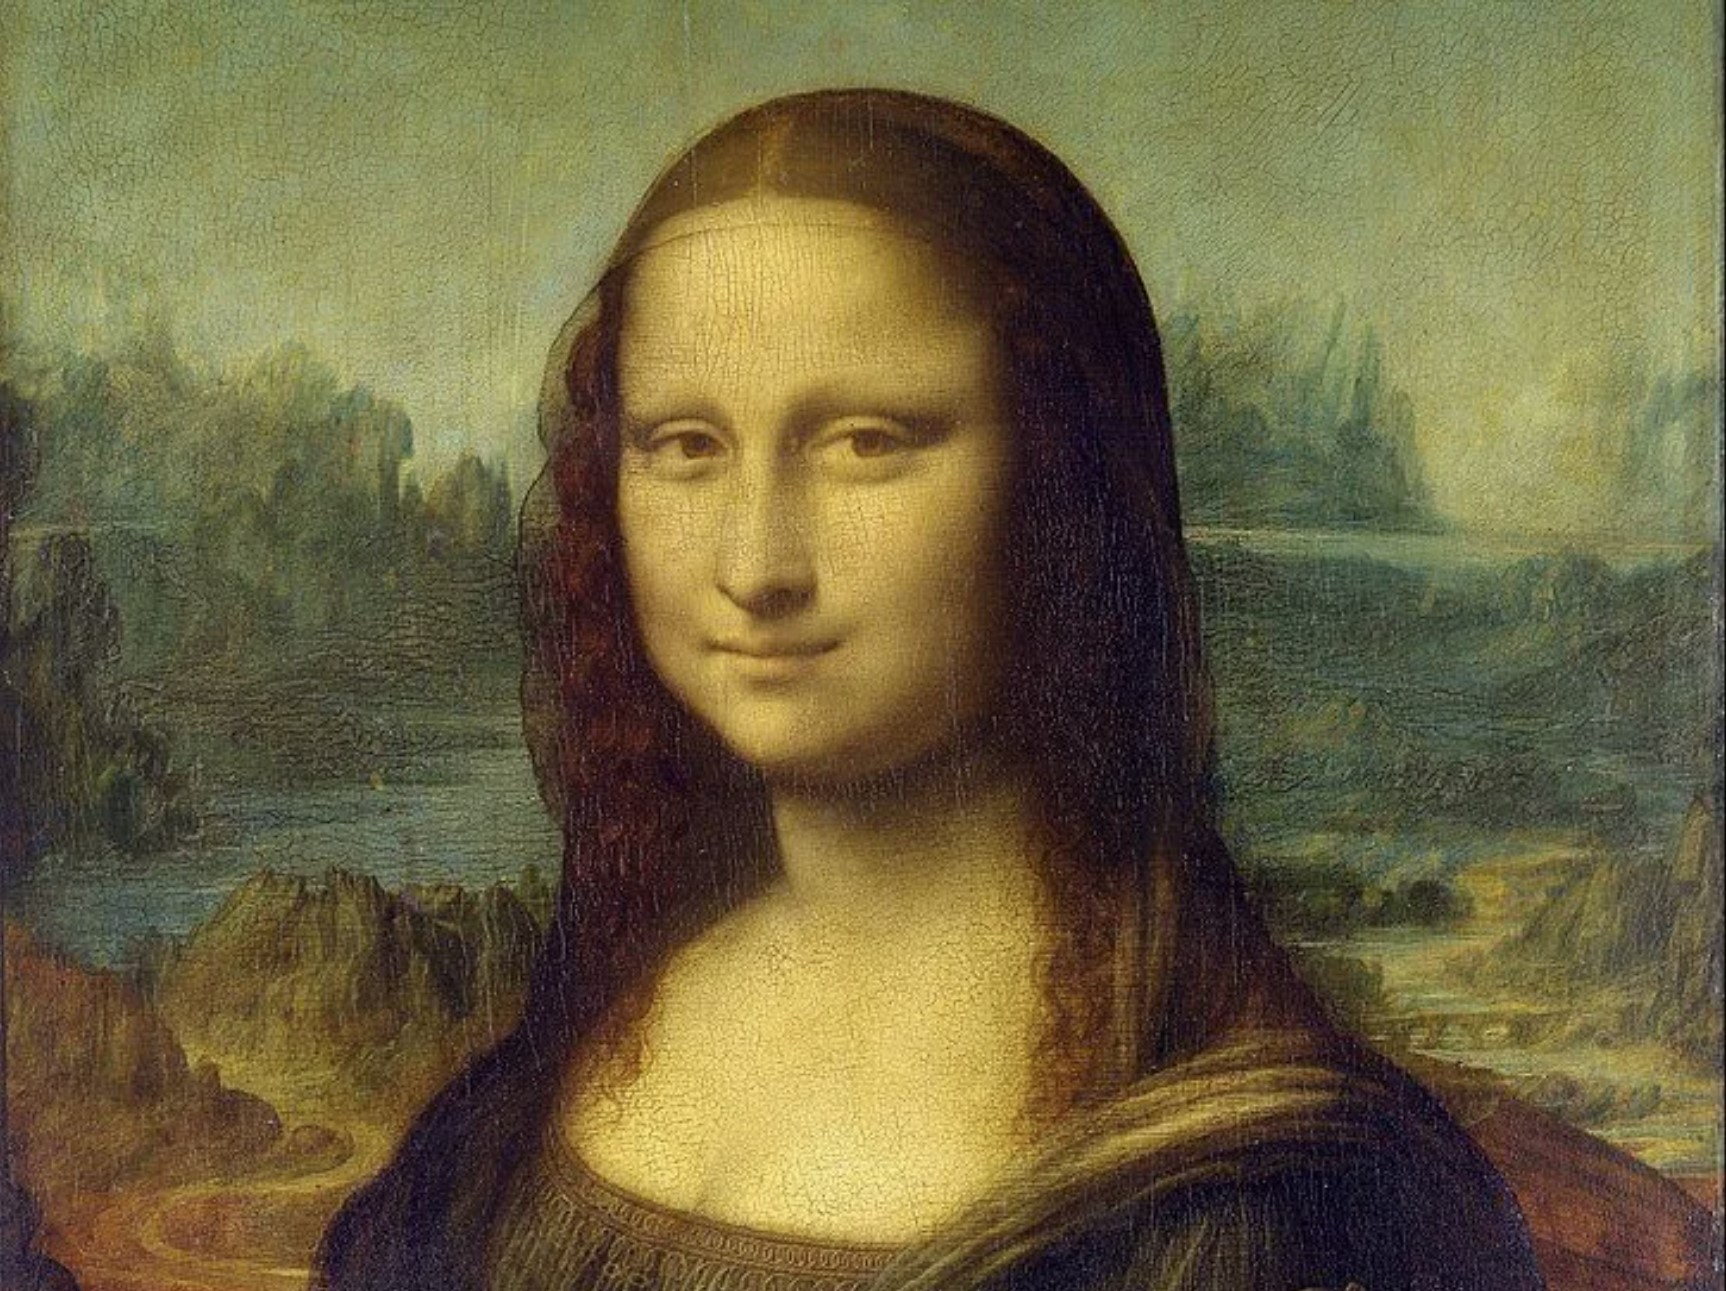

In [9]:
from swarmauri.utils.img_url_to_in_memory_img import img_url_to_in_memory_img
from IPython.display import display

image_url = "https://llava-vl.github.io/static/images/monalisa.jpg"
actual_image = img_url_to_in_memory_img(image_url)
display(actual_image)

As we can see, the image is an iconic picture (The drawing of Monalisa)
Now we are going to feed this url and our prompt to the model and see what it generates.
We will achieve this using the `process_image` method (for synchronous processing)

In [10]:
prompt = "Who drew this painting and what is this painting known for?"
result = model.process_image(image_url=image_url, prompt=prompt)

In [11]:
print(result)

The painting you've shown is the Mona Lisa, which is one of the most famous works of art in the world. It was painted by the Italian artist Leonardo da Vinci during the Renaissance. The Mona Lisa is known for its subtle modeling, atmospheric illusionism, and the subject's enig


As you can see, the model was able to corrected talk about the picture and answer the question.
This is just a simple use case of vision models, you can think of other use cases and try them out.

**You can also use the Asynchronous version of the `process_image` method.** 
**The `aprocess_image` method allows you to asynchronously process an image.**

In [ ]:
result = await model.aprocess_image(image_url=image_url, prompt=prompt)

### Generating batch answers 

To send the questions and images in batches and generate the answer, you can use the `batch` method

In [12]:
image_urls = [
    "https://llava-vl.github.io/static/images/monalisa.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
]
prompts = [
    "Who painted this artwork?",
    "Describe what can be seen in this image.",
]

results = model.batch(image_urls=image_urls, prompts=prompts)

In [15]:
for result in results:
    print(f"Answer: {result}")

Answer: The artwork you've shown is "Mona Lisa," a world-famous painting by Leonardo da Vinci. It is one of the most recognized and celebrated artworks in the world, known for its subject's enigmatic expression and the atmospheric illusionism that gives the painting its unique quality.
Answer: The image shows a serene landscape with a wooden boardwalk or path leading through a field of tall grass. The grass appears lush and green, suggesting it might be spring or summer. The sky is partly cloudy with patches of blue visible, indicating fair weather conditions. In the distance, there are trees and a line of


For asynchronous batch processing, you can use `abacth` method.
Check the code below for an example on how to use it

In [ ]:
results = await model.abatch(prompts=prompts)

#### **You can as well stream the response using the `stream` method for synchronous streaming and `astream` for asynchronous streaming.**
Let me show an example below.

In [1]:
from swarmauri.utils import print_notebook_metadata

metadata = print_notebook_metadata.print_notebook_metadata("Victory Nnaji", "3rd-Son")
print(metadata)

Author: Victory Nnaji
GitHub Username: 3rd-Son
Notebook File: Notebook_02_Worklng_with_FalAIVisionModel.ipynb
Last Modified: 2024-12-24 13:34:21.761308
Platform: Darwin 24.1.0
Python Version: 3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
Swarmauri Version: 0.5.2
None
